In [1]:
# Importing necessary libraries
import pandas as pd                    # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier   # For implementing the Random Forest Classifier
from sklearn.metrics import accuracy_score, confusion_matrix  # For evaluating model performance
import matplotlib.pyplot as plt        # For data visualization
import scipy as sc                      # For scientific computing


In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv(r"F:\technex\train.csv")
df

,Unnamed: 0.1,Unnamed: 0,longitude,latitude,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5,SEVERITYCODE
0,8084,8085,-122.315747,47.715237,Angles,2,0,0,2,0,...,NaN,5.37,0.00,NaN,NaN,46.5,56,37,14.1,0
1,33665,33666,-122.347934,47.613599,Rear Ended,2,0,0,2,0,...,NaN,8.28,0.09,0.0,0.0,49.5,55,44,23.0,0
2,75209,75210,-122.346792,47.704944,Rear Ended,2,0,0,2,0,...,NaN,8.05,0.00,0.0,0.0,47.0,56,42,21.0,0
3,59036,59037,-122.330592,47.634598,Parked Car,5,3,0,2,3,...,NaN,5.14,0.23,0.0,0.0,44.0,55,40,16.1,1
4,85790,85791,-122.334883,47.579656,Left Turn,2,0,0,2,0,...,NaN,5.59,0.00,0.0,0.0,61.0,73,50,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78312,102005,102006,-122.346479,47.661683,Angles,2,0,0,2,0,...,NaN,7.83,0.00,0.0,0.0,64.0,77,55,18.1,0
78313,82797,82798,-122.301539,47.559498,Rear Ended,5,0,0,3,4,...,1.0,6.49,0.00,0.0,0.0,67.0,72,56,19.0,1
78314,110423,110424,-122.324380,47.598868,Rear Ended,5,0,0,2,1,...,NaN,7.38,0.96,0.0,0.0,49.0,56,45,17.0,1
78315,5714,5715,-122.349999,47.654749,Sideswipe,3,0,0,2,0,...,NaN,3.13,0.00,NaN,NaN,51.5,58,45,14.1,0


In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'longitude', 'latitude', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',
       'HITPARKEDCAR', 'SPDCASENO', 'DATE', 'TIME', 'intersection_related',
       'response_type', 'response_time', 'AWND', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'TMAX', 'TMIN', 'WSF5', 'SEVERITYCODE'],
      dtype='object')

In [5]:
df.drop(columns=df.columns[0:2],inplace=True)
df

,longitude,latitude,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,...,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5,SEVERITYCODE
0,-122.315747,47.715237,Angles,2,0,0,2,0,0,0,...,NaN,5.37,0.00,NaN,NaN,46.5,56,37,14.1,0
1,-122.347934,47.613599,Rear Ended,2,0,0,2,0,0,0,...,NaN,8.28,0.09,0.0,0.0,49.5,55,44,23.0,0
2,-122.346792,47.704944,Rear Ended,2,0,0,2,0,0,0,...,NaN,8.05,0.00,0.0,0.0,47.0,56,42,21.0,0
3,-122.330592,47.634598,Parked Car,5,3,0,2,3,0,0,...,NaN,5.14,0.23,0.0,0.0,44.0,55,40,16.1,1
4,-122.334883,47.579656,Left Turn,2,0,0,2,0,0,0,...,NaN,5.59,0.00,0.0,0.0,61.0,73,50,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78312,-122.346479,47.661683,Angles,2,0,0,2,0,0,0,...,NaN,7.83,0.00,0.0,0.0,64.0,77,55,18.1,0
78313,-122.301539,47.559498,Rear Ended,5,0,0,3,4,0,0,...,1.0,6.49,0.00,0.0,0.0,67.0,72,56,19.0,1
78314,-122.324380,47.598868,Rear Ended,5,0,0,2,1,0,0,...,NaN,7.38,0.96,0.0,0.0,49.0,56,45,17.0,1
78315,-122.349999,47.654749,Sideswipe,3,0,0,2,0,0,0,...,NaN,3.13,0.00,NaN,NaN,51.5,58,45,14.1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78317 entries, 0 to 78316
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             78317 non-null  float64
 1   latitude              78317 non-null  float64
 2   COLLISIONTYPE         78317 non-null  object 
 3   PERSONCOUNT           78317 non-null  int64  
 4   PEDCOUNT              78317 non-null  int64  
 5   PEDCYLCOUNT           78317 non-null  int64  
 6   VEHCOUNT              78317 non-null  int64  
 7   INJURIES              78317 non-null  int64  
 8   SERIOUSINJURIES       78317 non-null  int64  
 9   FATALITIES            78317 non-null  int64  
 10  JUNCTIONTYPE          78317 non-null  object 
 11  INATTENTIONIND        78317 non-null  bool   
 12  UNDERINFL             78317 non-null  bool   
 13  WEATHER               78317 non-null  object 
 14  ROADCOND              78317 non-null  object 
 15  LIGHTCOND          

## Data Types Summary

- Integer (int64): 11 columns
- Float (float64): 10 columns
- Boolean (bool): 5 columns
- Object (string): 7 columns

In [7]:
df.describe()

,longitude,latitude,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,LIGHTCOND,...,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5,SEVERITYCODE
count,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,...,10571.000000,78317.000000,78317.000000,59284.000000,59284.000000,78317.000000,78317.000000,78317.000000,77398.000000,78317.000000
mean,-122.335219,47.618673,2.721108,0.057025,0.041792,2.038191,0.478134,0.017902,0.001800,2.385906,...,8.738341,7.612382,0.128585,0.015112,0.020188,53.500147,61.159429,46.355351,21.532839,0.377223
std,0.027601,0.055520,1.347584,0.243757,0.201956,0.556465,0.778200,0.141718,0.043287,0.919924,...,12.448799,3.061248,0.268067,0.205799,0.255305,10.528537,13.041340,8.938734,7.560416,0.527969
min,-122.419544,47.495058,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.450000,0.000000,0.000000,0.000000,20.000000,25.000000,14.000000,6.000000,0.000000
25%,-122.351881,47.576514,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,5.370000,0.000000,0.000000,0.000000,45.500000,51.000000,40.000000,16.100000,0.000000
50%,-122.335480,47.614600,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,3.000000,7.160000,0.000000,0.000000,0.000000,53.000000,60.000000,47.000000,19.900000,0.000000
75%,-122.317275,47.662823,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,...,11.000000,9.400000,0.140000,0.000000,0.000000,62.000000,71.000000,53.000000,25.100000,1.000000
max,-122.251965,47.734185,47.000000,6.000000,2.000000,15.000000,15.000000,5.000000,2.000000,3.000000,...,60.000000,21.250000,3.250000,6.800000,7.100000,87.000000,103.000000,71.000000,68.900000,3.000000


In [8]:
# Boolean Columns
boolean_columns = ['INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'HITPARKEDCAR', 'intersection_related']

# Numeric Columns
numeric_columns = ['longitude', 'latitude', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
                   'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'LIGHTCOND', 'TIME', 'response_time', 
                   'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WSF5']

# Categorical Columns
categorical_columns = ['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'response_type']


In [9]:
print

<function print>

In [10]:

df['DATE'] = pd.to_datetime(df['DATE'])

# Convert TIME to integer (assuming it represents time in HHMM format)
df['TIME'] = df['TIME'].astype(int)

In [11]:
# Drop the "SPDCASENO" column
df.drop(columns=['SPDCASENO'], inplace=True)


In [12]:
for col in categorical_columns:
    print(f'{col}->\n{df[col].value_counts()}')
    print("----")

COLLISIONTYPE->
Angles        18442
Parked Car    17246
Rear Ended    16376
Sideswipe      9086
Left Turn      7223
Pedestrian     4095
Cycles         3234
Right Turn     1506
Head On        1109
Name: COLLISIONTYPE, dtype: int64
----
JUNCTIONTYPE->
Mid-Block            42786
At Intersection      31860
Driveway Junction     3601
Ramp Junction           70
Name: JUNCTIONTYPE, dtype: int64
----
WEATHER->
Clear                       51139
Raining                     14501
Overcast                    12031
Snowing                       331
Fog/Smog/Smoke                242
Sleet/Hail/Freezing Rain       44
Blowing Sand/Dirt              18
Severe Crosswind               11
Name: WEATHER, dtype: int64
----
ROADCOND->
Dry               56907
Wet               20610
Ice                 397
Snow/Slush          365
Standing Water       18
Sand/Mud/Dirt        15
Oil                   5
Name: ROADCOND, dtype: int64
----
response_type->
Motor Vehicle Accident            5861
MVI - Motor Vehicle I

In [13]:
for col in boolean_columns:
    print(f'{col}->\n{df[col].value_counts()}')
    print("----")

INATTENTIONIND->
False    62862
True     15455
Name: INATTENTIONIND, dtype: int64
----
UNDERINFL->
False    74514
True      3803
Name: UNDERINFL, dtype: int64
----
SPEEDING->
False    75570
True      2747
Name: SPEEDING, dtype: int64
----
HITPARKEDCAR->
False    75490
True      2827
Name: HITPARKEDCAR, dtype: int64
----
intersection_related->
False    47338
True     30979
Name: intersection_related, dtype: int64
----


In [14]:
df.isnull().sum()

longitude                   0
latitude                    0
COLLISIONTYPE               0
PERSONCOUNT                 0
PEDCOUNT                    0
PEDCYLCOUNT                 0
VEHCOUNT                    0
INJURIES                    0
SERIOUSINJURIES             0
FATALITIES                  0
JUNCTIONTYPE                0
INATTENTIONIND              0
UNDERINFL                   0
WEATHER                     0
ROADCOND                    0
LIGHTCOND                   0
SPEEDING                    0
HITPARKEDCAR                0
DATE                        0
TIME                        0
intersection_related        0
response_type           67746
response_time           67746
AWND                        0
PRCP                        0
SNOW                    19033
SNWD                    19033
TAVG                        0
TMAX                        0
TMIN                        0
WSF5                      919
SEVERITYCODE                0
dtype: int64

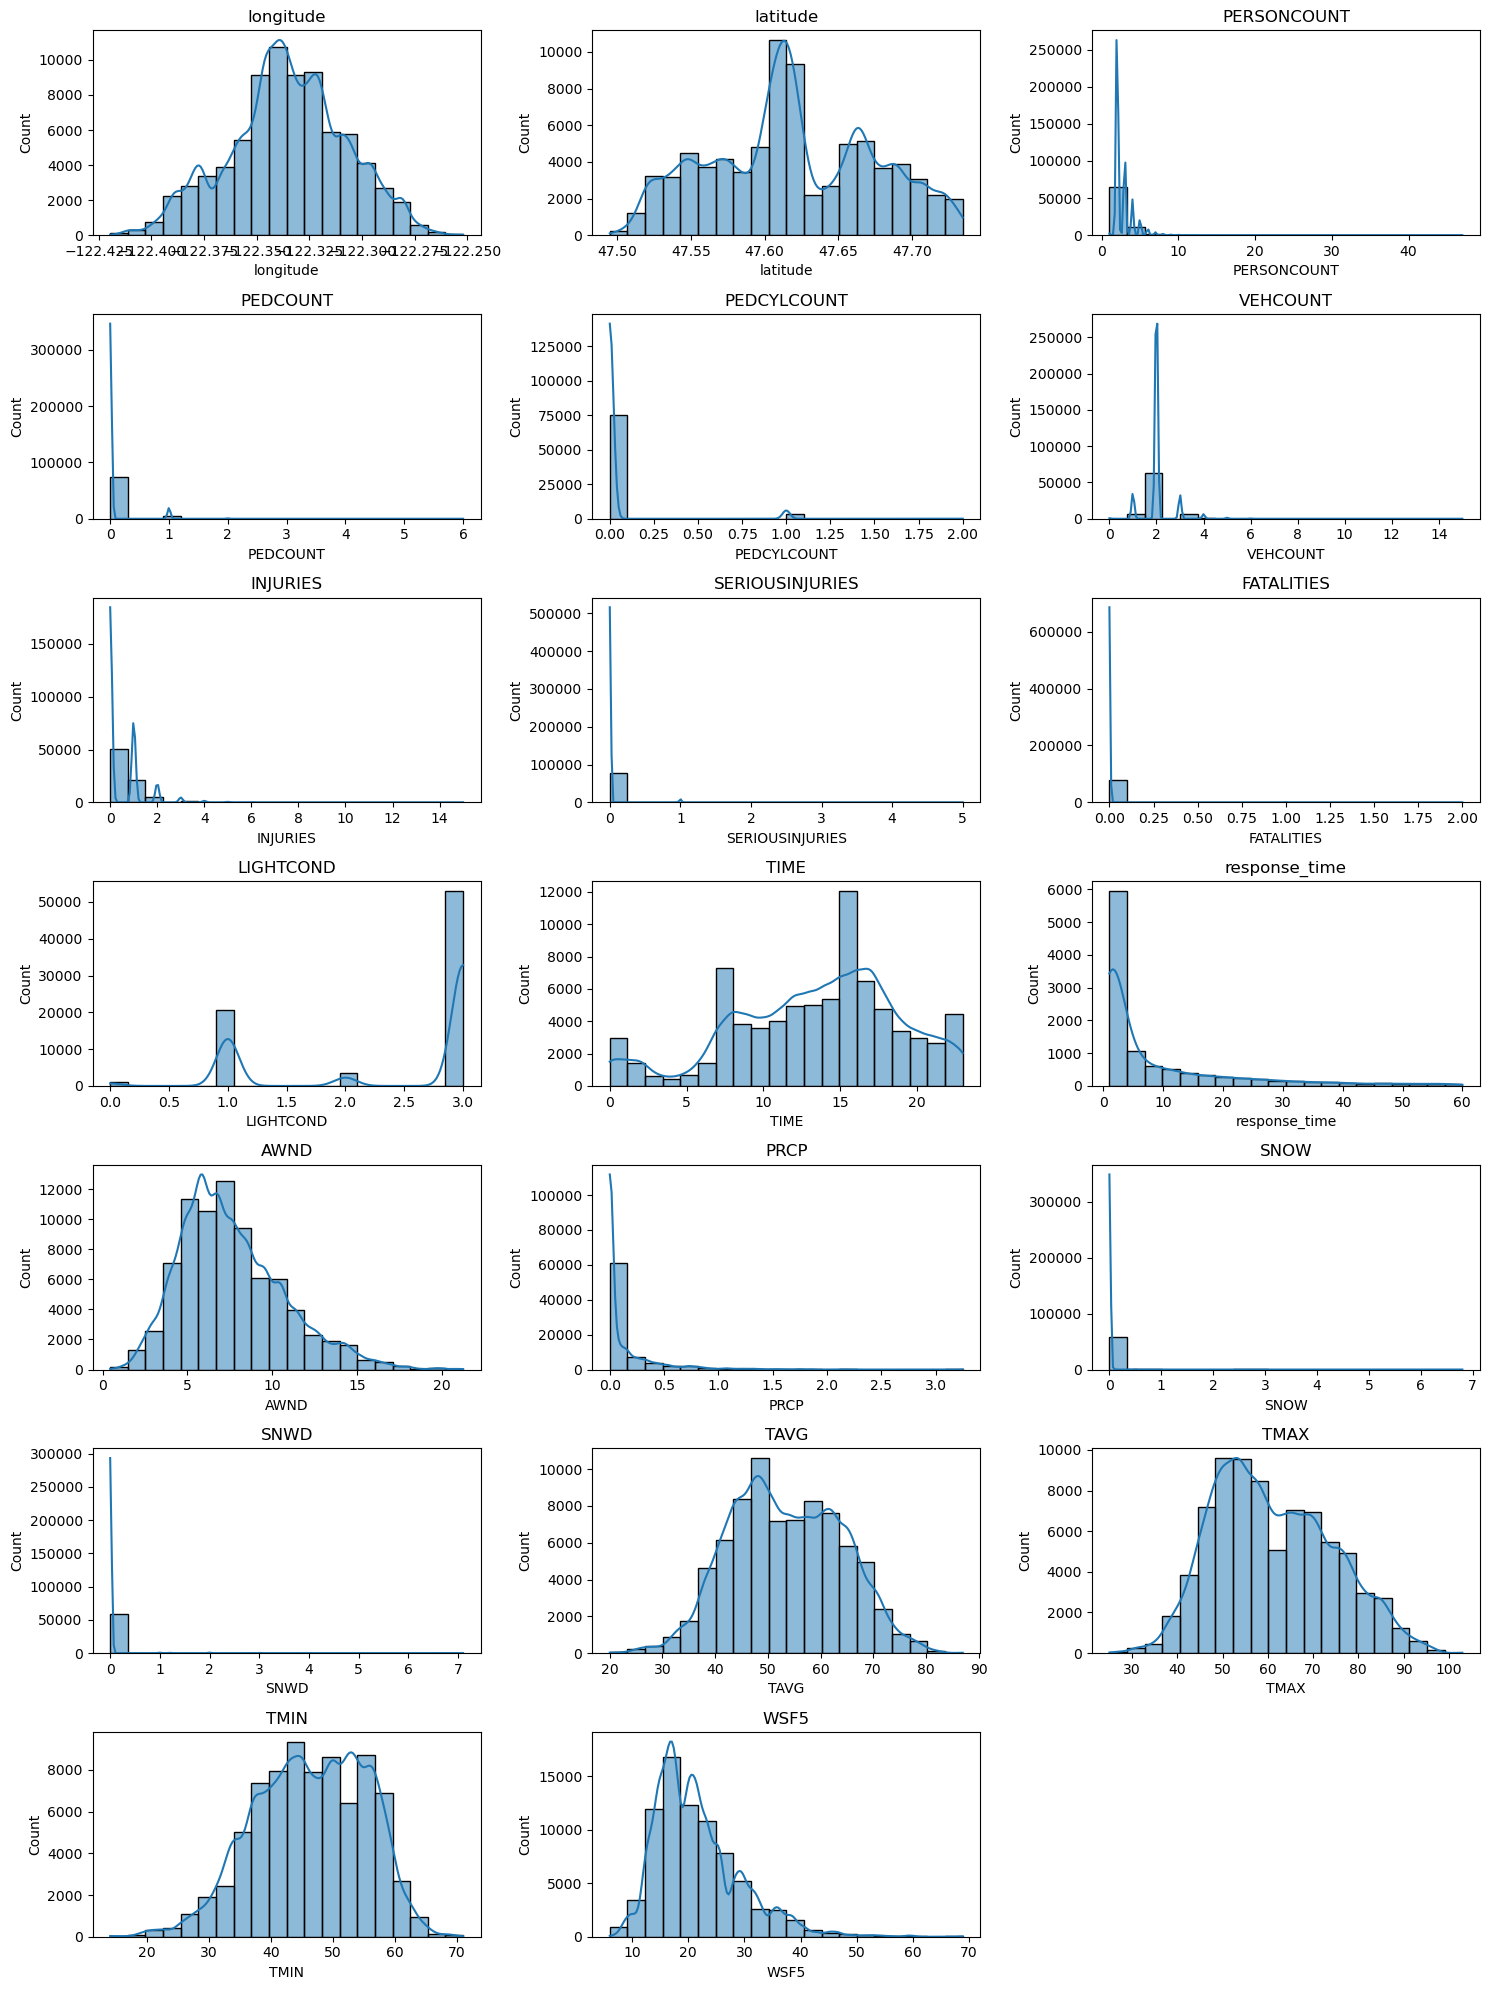

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Convert relevant columns to categorical (excluding boolean columns)


# Plot numerical columns
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(7, 3, i)
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()




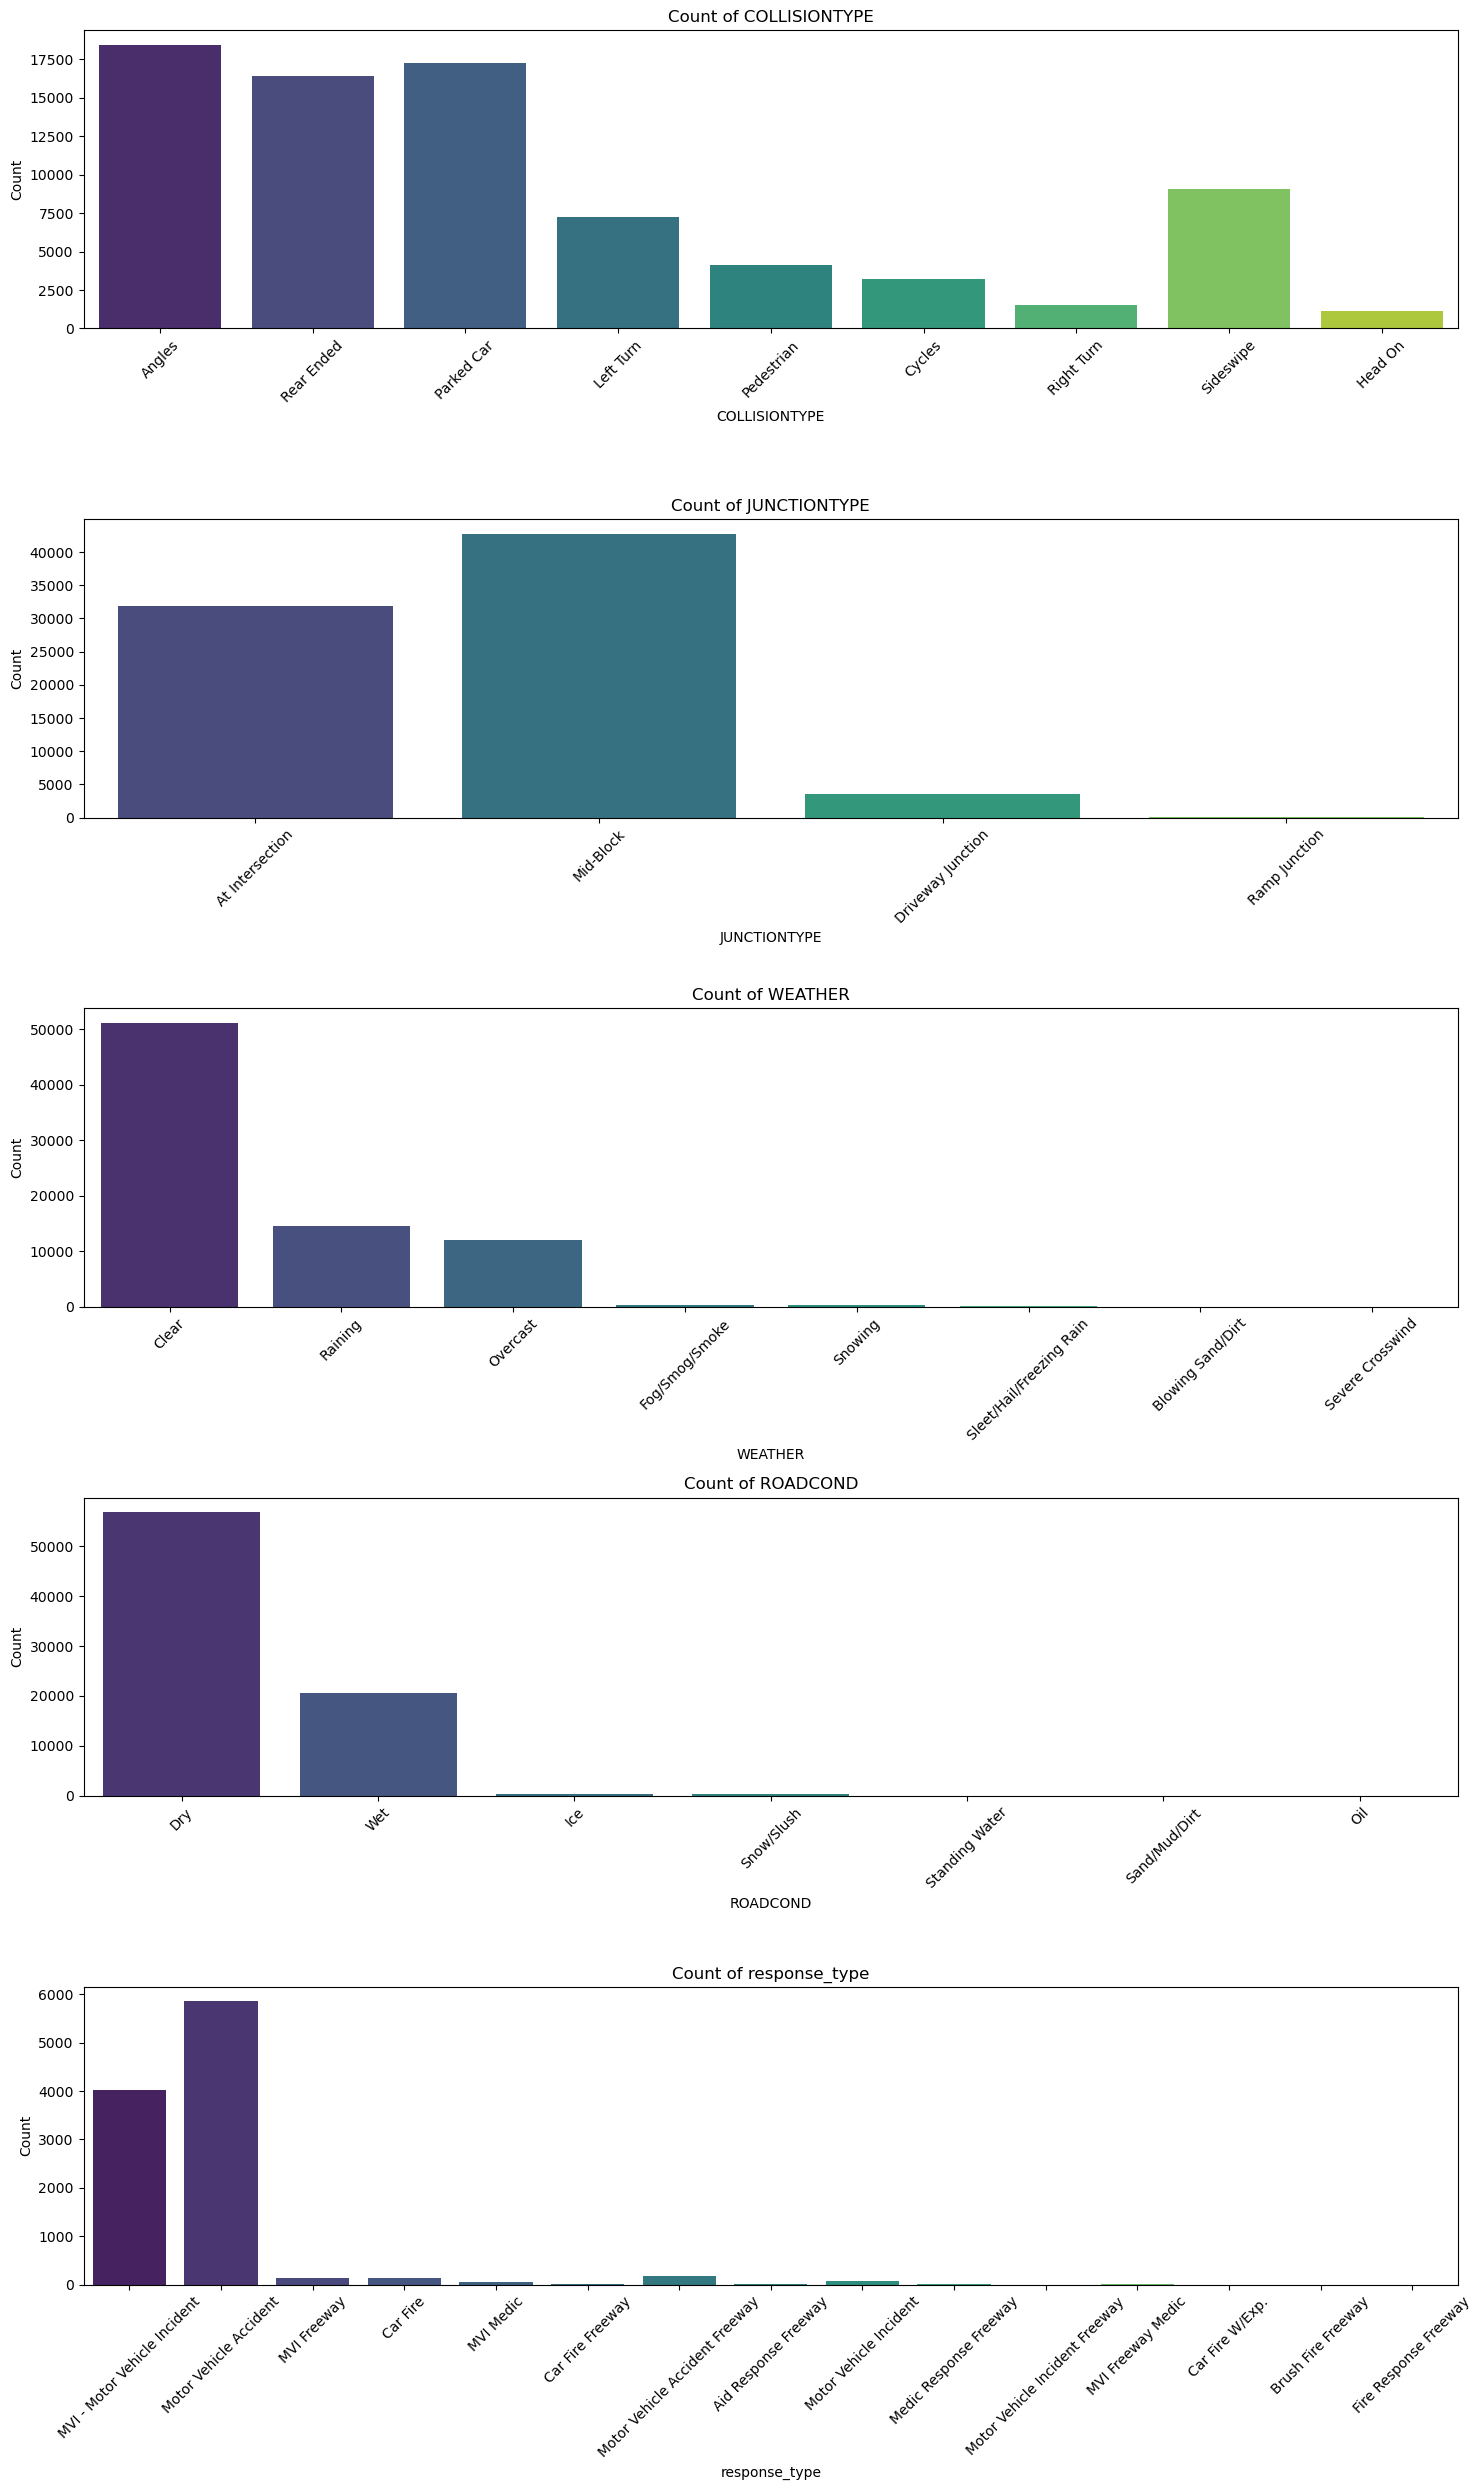

In [16]:
categorical_columns = ['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'response_type']


plt.figure(figsize=(15, 5*len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i+1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


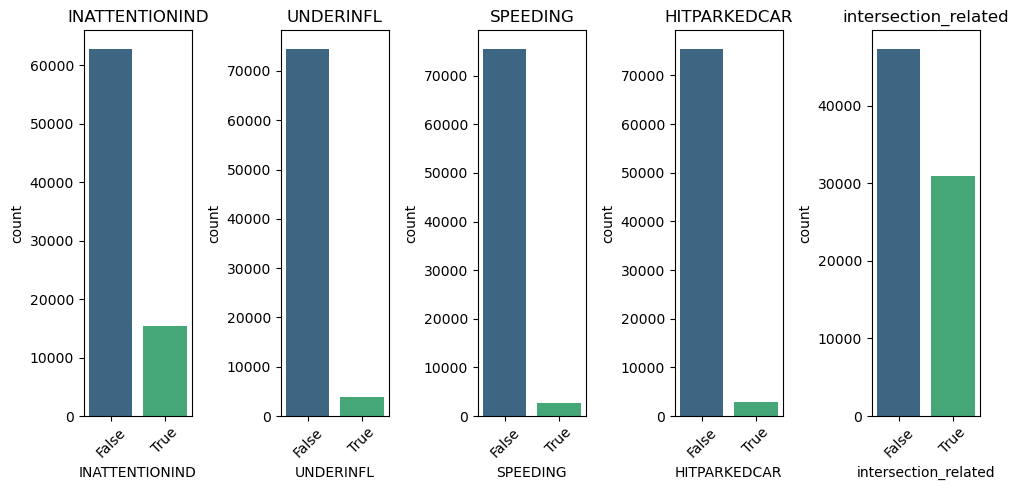

In [17]:
plt.figure(figsize=(10, 5))
boolean_columns = ['INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'HITPARKEDCAR', 'intersection_related']
for i, col in enumerate(boolean_columns, 1):
    plt.subplot(1, 5, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot DATE column


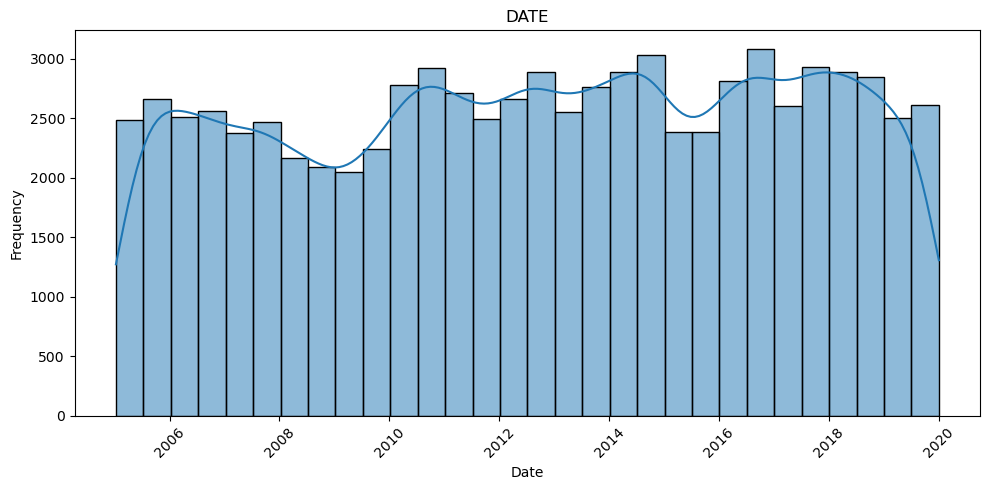

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='DATE', bins=30, kde=True)
plt.title('DATE')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

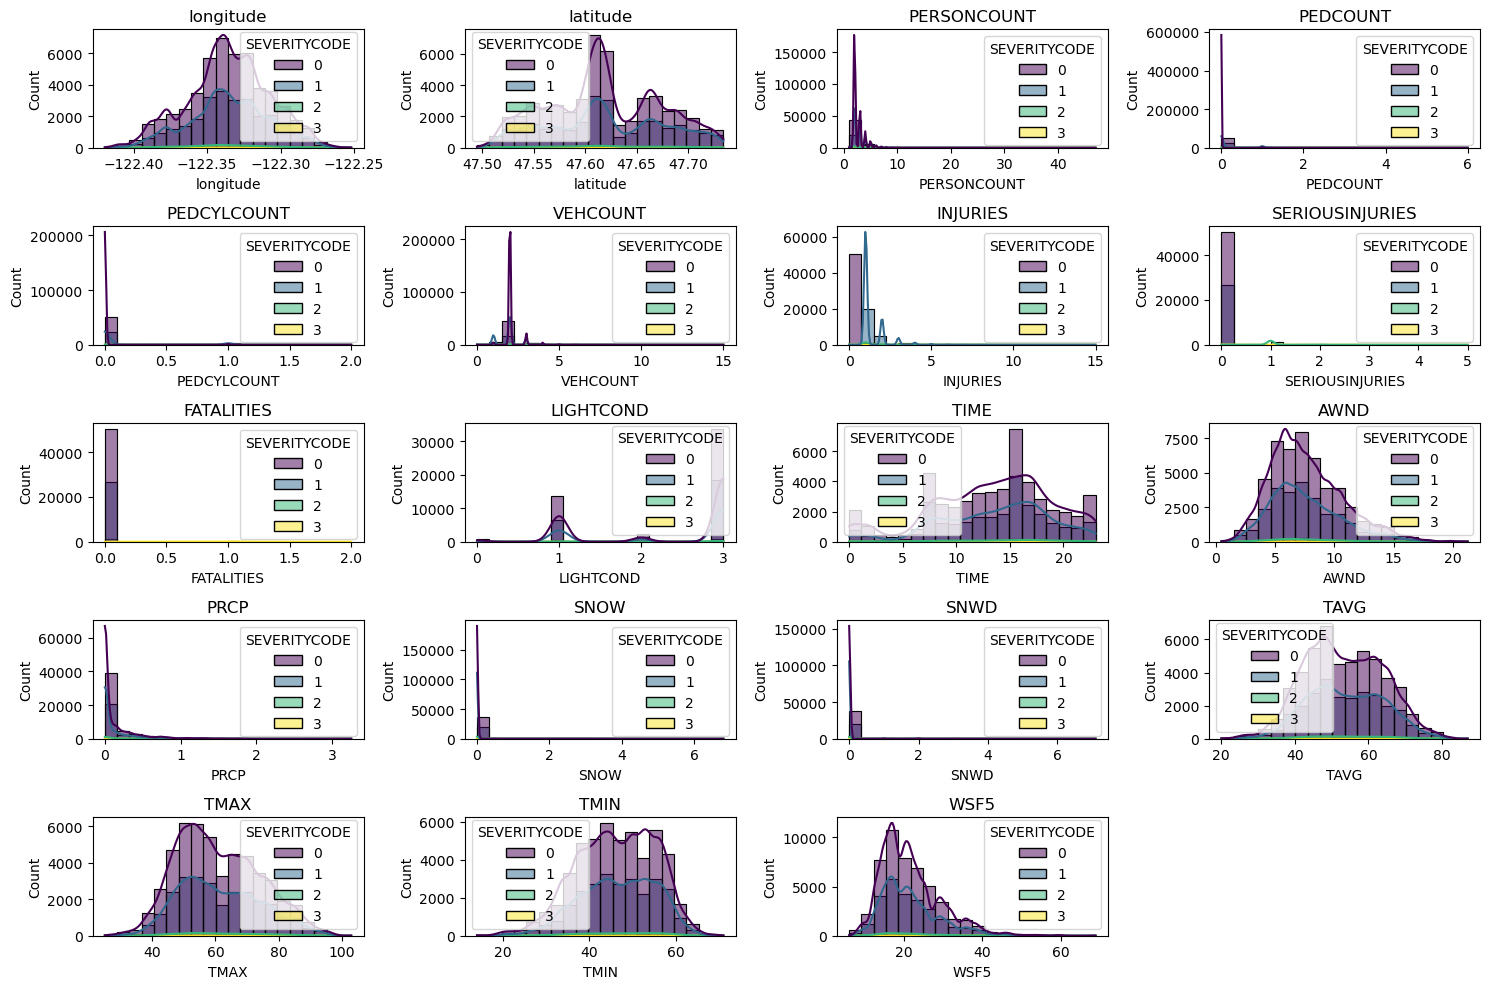

In [19]:
numerical_columns = ['longitude', 'latitude', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
                     'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'LIGHTCOND', 'TIME', 'AWND', 'PRCP', 
                     'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WSF5']


# Prepare features and target variable
X = df[numerical_columns + categorical_columns]
y = df['SEVERITYCODE']  # Assuming 'SEVERITYCODE' is the target variable

# Visualize relationships between features and target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 4, i+1)
    sns.histplot(data=df, x=col, hue='SEVERITYCODE', bins=20, kde=True, palette='viridis')
    plt.title(col)
plt.tight_layout()
plt.show()



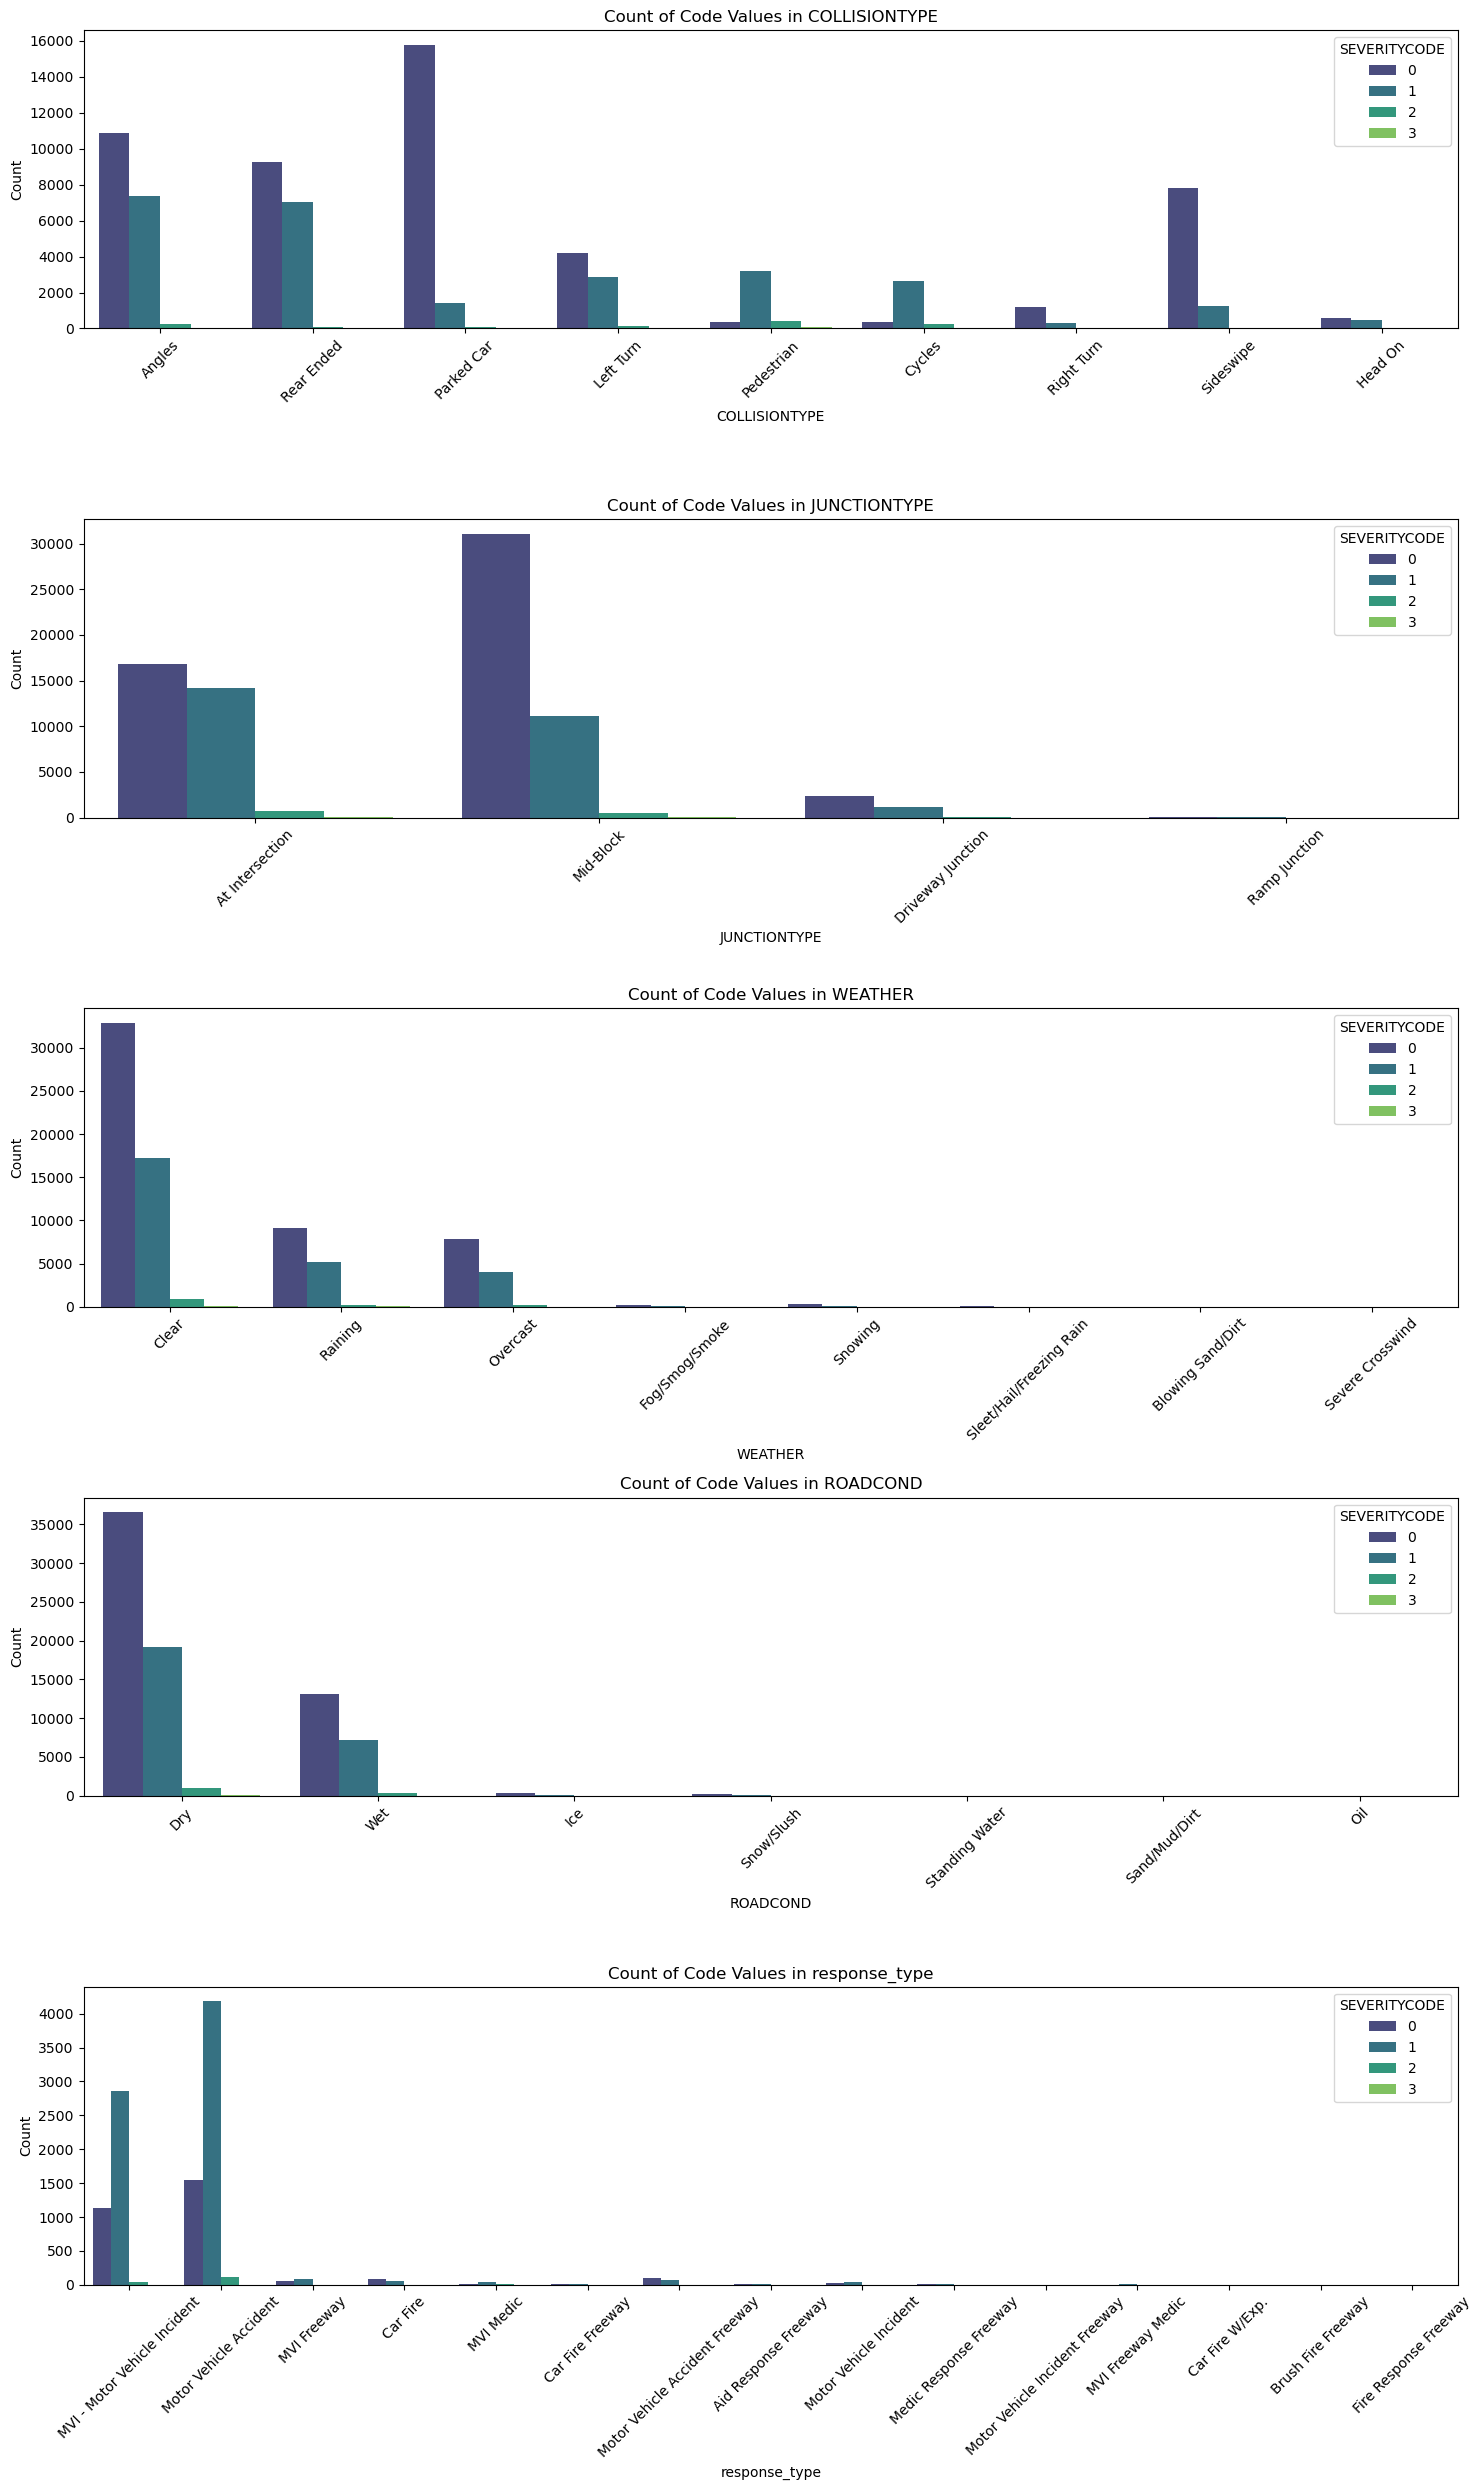

In [20]:
plt.figure(figsize=(15, 5*len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i+1)
    sns.countplot(data=df, x=col, hue='SEVERITYCODE', palette='viridis')
    plt.title(f'Count of Code Values in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='SEVERITYCODE')

plt.tight_layout()
plt.show()

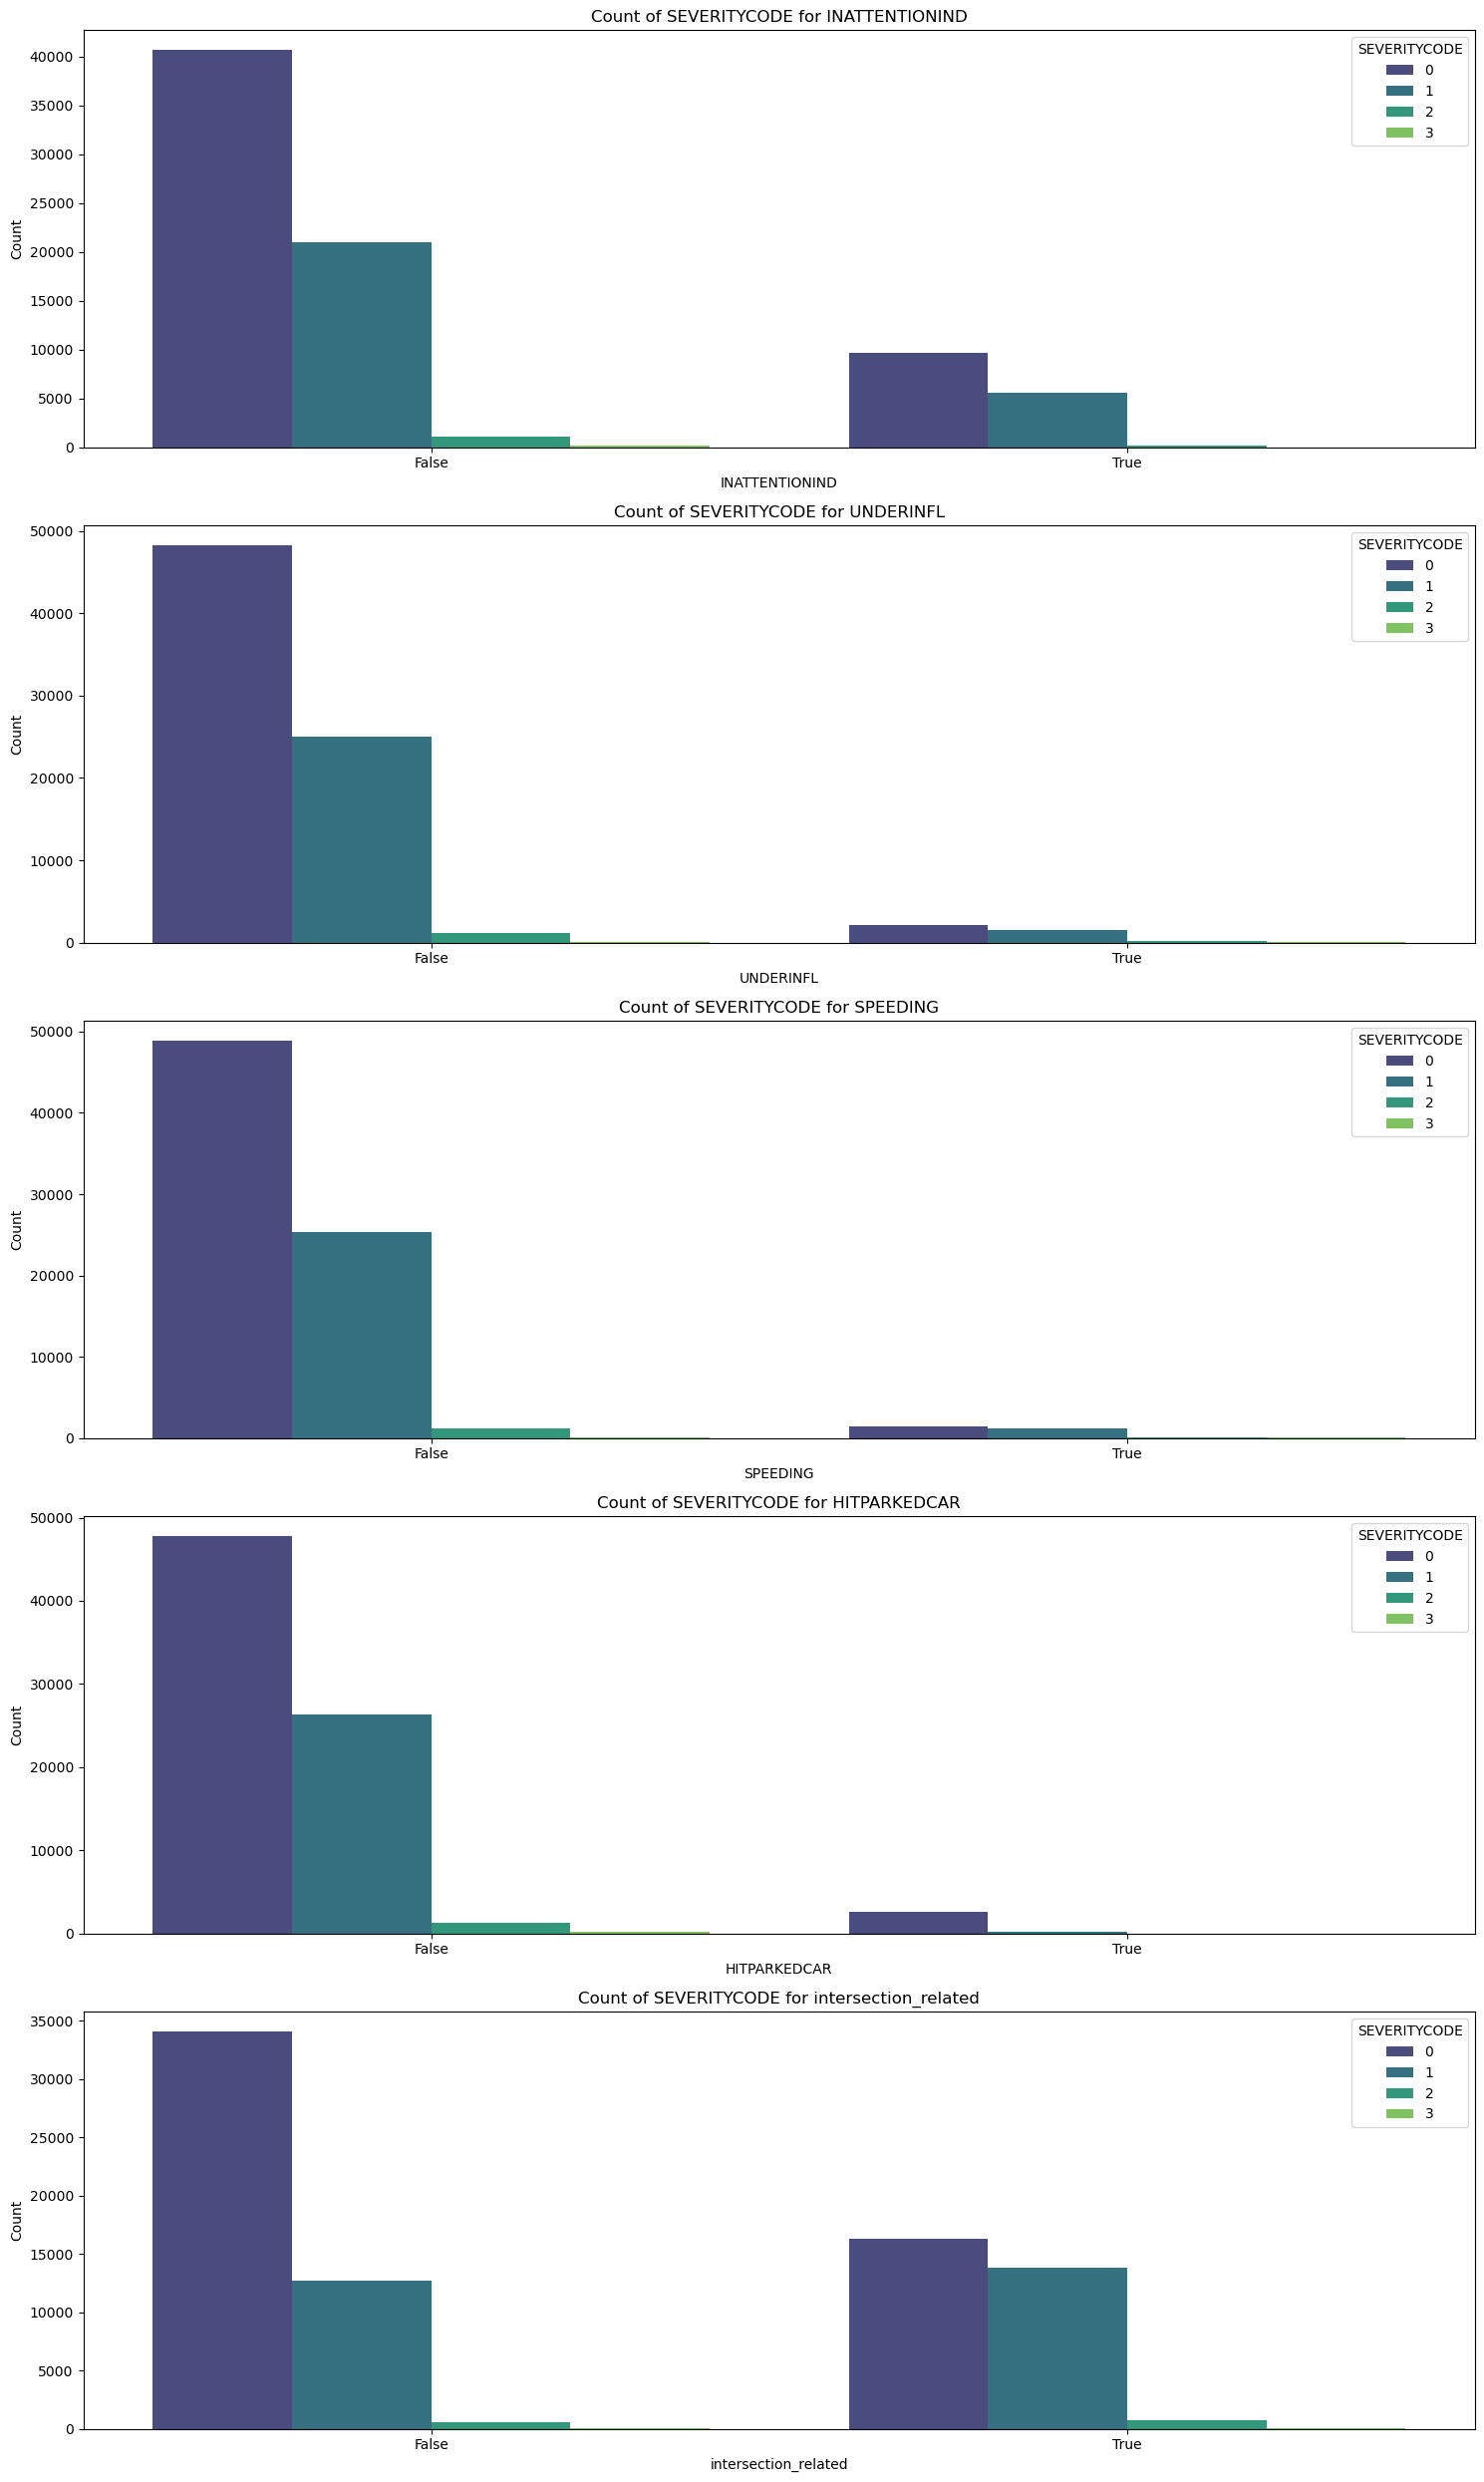

In [21]:
plt.figure(figsize=(15, 5*len(boolean_columns)))

for i, col in enumerate(boolean_columns):
    plt.subplot(len(boolean_columns), 1, i+1)
    sns.countplot(data=df, x=col, hue='SEVERITYCODE', palette='viridis')
    plt.title(f'Count of SEVERITYCODE for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='SEVERITYCODE')

plt.tight_layout()
plt.show()

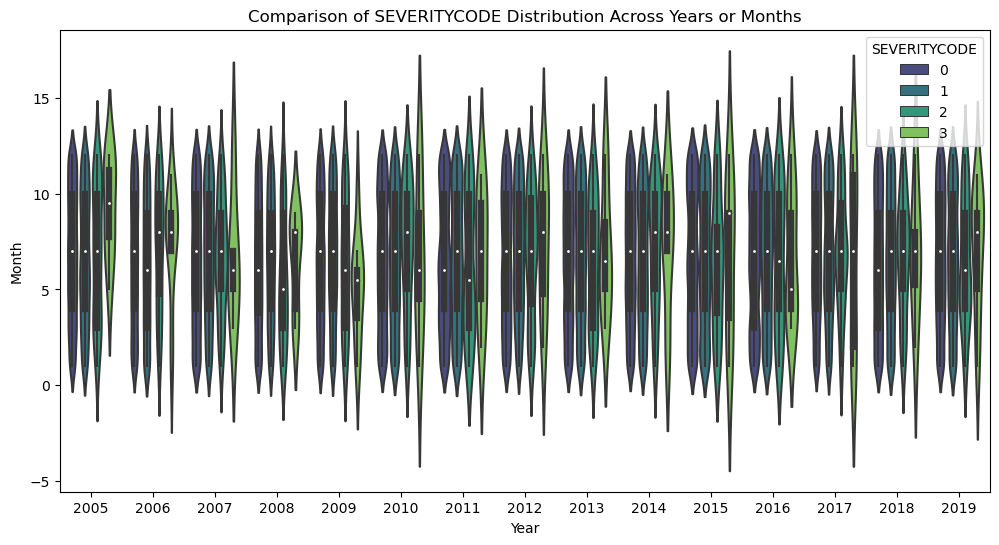

In [22]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract year and month from DATE column
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month

# Plot violin plot or box plot to compare distribution of SEVERITYCODE across different months or years
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Year', y='Month', hue='SEVERITYCODE', palette='viridis')
plt.title('Comparison of SEVERITYCODE Distribution Across Years or Months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.legend(title='SEVERITYCODE')
plt.show()

To address the presence of null values within our dataset, we have implemented a preprocessing step where these null values are encoded separately. This ensures that the missing values are appropriately handled during model training.

In [23]:
df.dtypes

longitude                      float64
latitude                       float64
COLLISIONTYPE                   object
PERSONCOUNT                      int64
PEDCOUNT                         int64
PEDCYLCOUNT                      int64
VEHCOUNT                         int64
INJURIES                         int64
SERIOUSINJURIES                  int64
FATALITIES                       int64
JUNCTIONTYPE                    object
INATTENTIONIND                    bool
UNDERINFL                         bool
WEATHER                         object
ROADCOND                        object
LIGHTCOND                        int64
SPEEDING                          bool
HITPARKEDCAR                      bool
DATE                    datetime64[ns]
TIME                             int32
intersection_related              bool
response_type                   object
response_time                  float64
AWND                           float64
PRCP                           float64
SNOW                     

In [24]:
# List of columns to drop
columns_to_drop = ['DATE']

# Dropping the columns from the DataFrame
df = df.drop(columns=columns_to_drop)


In [46]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define boolean, numeric, and categorical columns
boolean_columns = ['INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'HITPARKEDCAR', 'intersection_related']
numeric_columns = ['longitude', 'latitude', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
                   'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'LIGHTCOND', 'TIME', 'response_time', 
                   'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WSF5']
categorical_columns = ['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'response_type']

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Handle missing values with mean
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Fill missing values with 'Unknown'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('bool', 'passthrough', boolean_columns)  # No transformation for boolean columns
    ])

# Transform the data
X = preprocessor.fit_transform(df.drop(columns=['SEVERITYCODE']))  # Exclude the target column
y = df['SEVERITYCODE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)
        # For Random Forest model, calculate feature importances



Random Forest Accuracy: 0.9994254341164454


F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.979379468845761
K-Nearest Neighbors Accuracy: 0.7450842696629213


In [43]:
print(confusion_matrix(y_pred,y_test))

[[9292 2964  152   12]
 [ 749 2379  108    8]
 [   0    0    0    0]
 [   0    0    0    0]]


In [ ]:
df.colum

In [56]:
test_df = pd.read_csv(r"F:\technex\test.csv")
test_df.drop(columns=test_df.columns[0:2],inplace=True)

test_df['DATE'] = pd.to_datetime(test_df['DATE'])

# Convert TIME to integer (assuming it represents time in HHMM format)
test_df['TIME'] = test_df['TIME'].astype(int)
test_df.drop(columns=['SPDCASENO'], inplace=True)
columns_to_drop = ['DATE']

# Dropping the columns from the DataFrame
X = preprocessor.fit_transform(df.drop(columns=['SEVERITYCODE']))  # Exclude the target column
y = df['SEVERITYCODE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)
        # For Random Forest model, calculate feature importances
# Preprocess the test data
processed_test_data = preprocessor.transform(test_df)

# Make predictions using the trained model
predictions = model.predict(processed_test_data)

# Add the predictions as a new column to the test DataFrame
test_df['prediction'] = predictions

# Save the DataFrame with predictions to a new CSV file
test_df.to_csv(r"F:\technex\test.csv", index=False)

# Display the DataFrame with predictions
print(test_df.head())


Random Forest Accuracy: 0.9994254341164454
    longitude   latitude COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  \
0 -122.346179  47.703847       Head On            2         0            0   
1 -122.350784  47.613079    Parked Car            2         0            0   
2 -122.312630  47.623909    Parked Car            2         0            0   
3 -122.347107  47.630123     Sideswipe            2         0            0   
4 -122.346309  47.733984        Angles            2         0            0   

   VEHCOUNT  INJURIES  SERIOUSINJURIES  FATALITIES  ... response_time  AWND  \
0         2         0                0           0  ...           NaN  8.95   
1         2         0                0           0  ...           NaN  7.83   
2         2         0                0           0  ...          11.0  8.28   
3         2         0                0           0  ...           NaN  4.25   
4         2         2                0           0  ...           NaN  6.26   

   PRCP SNOW 